In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix


In [2]:
Dataset = pd.read_csv('cleaned/10yrsmerged.csv')
#dataset = pd.read_csv('NewData.csv')

Dataset=Dataset[['Gender','CGPA','No. of Backlogs','Branch','Status']]
Dataset['No. of Backlogs'].fillna(0,inplace=True)
Dataset.head()

,Gender,CGPA,No. of Backlogs,Branch,Status
0,female,6.981,1.0,Biotechnology,Not Placed
1,female,5.400,0.0,Biotechnology,Not Placed
2,female,6.600,0.0,Biotechnology,Not Placed
3,female,5.100,1.0,Biotechnology,Not Placed
4,female,7.100,0.0,Biotechnology,Not Placed


In [3]:
Dataset["Gender"] = Dataset["Gender"].astype('category')
Dataset["Branch"] = Dataset["Branch"].astype('category')
Dataset["Status"] = Dataset["Status"].astype('category')
Dataset.dtypes

Gender             category
CGPA                float64
No. of Backlogs     float64
Branch             category
Status             category
dtype: object

In [4]:
Dataset["Gender"] = Dataset["Gender"].cat.codes #female=0 and male=1
Dataset["Branch"] = Dataset["Branch"].cat.codes #each branch allotted each digit from 1 to 8
Dataset["Status"] = Dataset["Status"].cat.codes #placed=1 not placed=0
Dataset.tail(1200)

,Gender,CGPA,No. of Backlogs,Branch,Status
7315,1,6.100000,0.0,7,1
7316,1,6.010000,0.0,7,1
7317,1,6.015000,3.0,7,0
7318,0,6.280000,2.0,7,0
7319,0,6.755556,0.0,7,0
...,...,...,...,...,...
8510,1,6.080000,0.0,8,0
8511,1,7.490000,0.0,8,1
8512,1,7.240000,0.0,8,0
8513,1,6.730000,0.0,8,0


In [5]:
X = Dataset.iloc[:, range(0, 4)].values
y = Dataset.iloc[:, 4].values


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [9]:
y_pred = classifier.predict(X_test)

In [10]:
classifier.score(X_train, y_train)

0.8172818791946309

In [11]:
classifier.score(X_test, y_test)

0.7287671232876712

In [12]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[ 375  423]
 [ 270 1487]]
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.47      0.52       798
           1       0.78      0.85      0.81      1757

    accuracy                           0.73      2555
   macro avg       0.68      0.66      0.67      2555
weighted avg       0.72      0.73      0.72      2555

Accuracy: 0.7287671232876712


In [13]:
print(classifier.predict([[0,4,3,4]]))

[1]


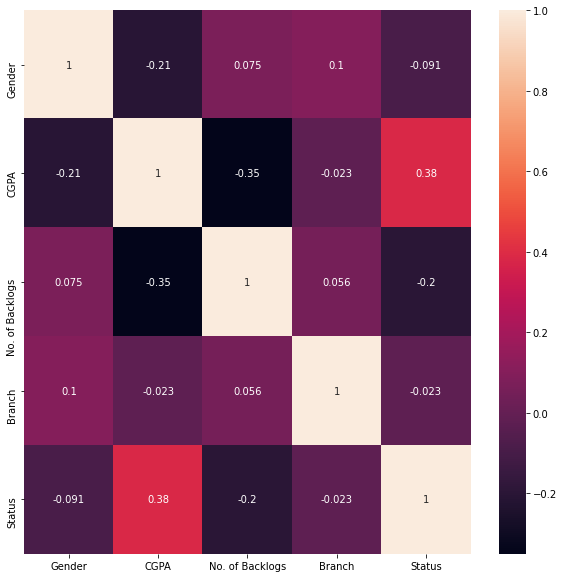

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(Dataset.corr(), annot=True)
plt.show()